In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from dateutil.parser import parse
plt.rcParams.update({'figure.figsize': (8, 4), 'figure.dpi': 120})

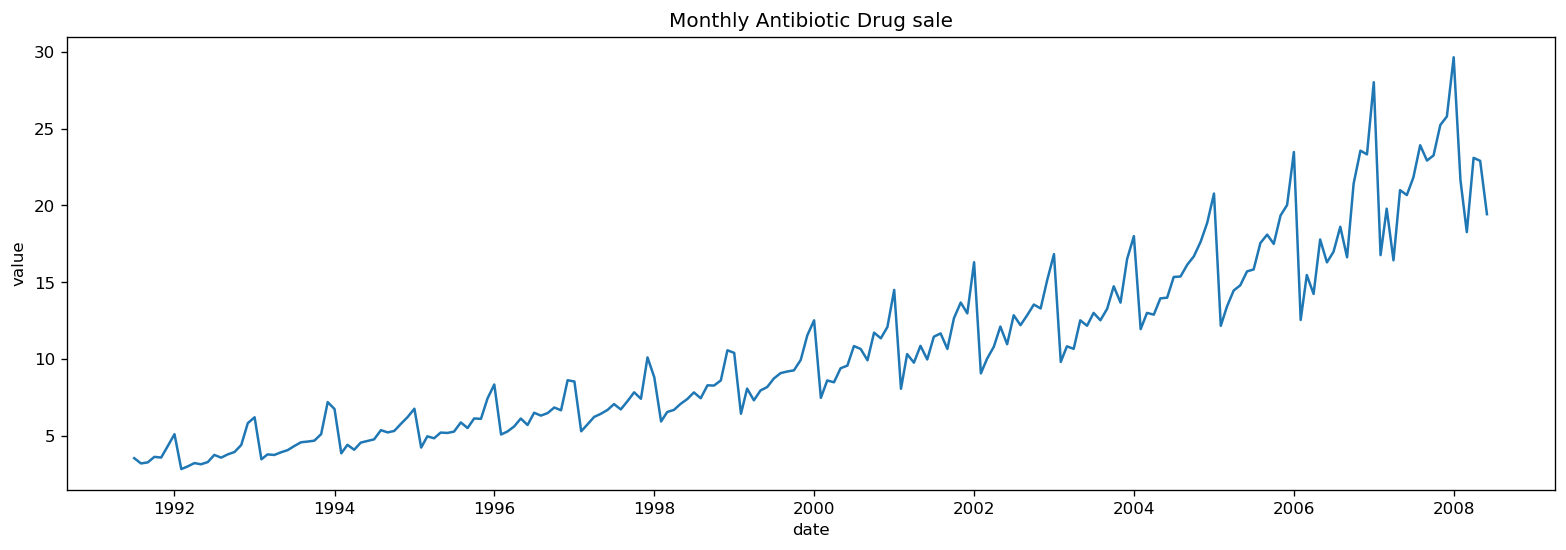

In [74]:
# Importing the dataframe
df = pd.read_csv("../Data/a10.csv", parse_dates=["date"], index_col="date")
# visualizing time seriesmspai
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
def plot_ts(df,x,y,title):
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel(df.index.name)
    plt.ylabel(df.value.name)

plot_ts(df,df.index,df.value,"Monthly Antibiotic Drug sale")

Text(0.5, 1.0, ' Air Passenger 2 side view')

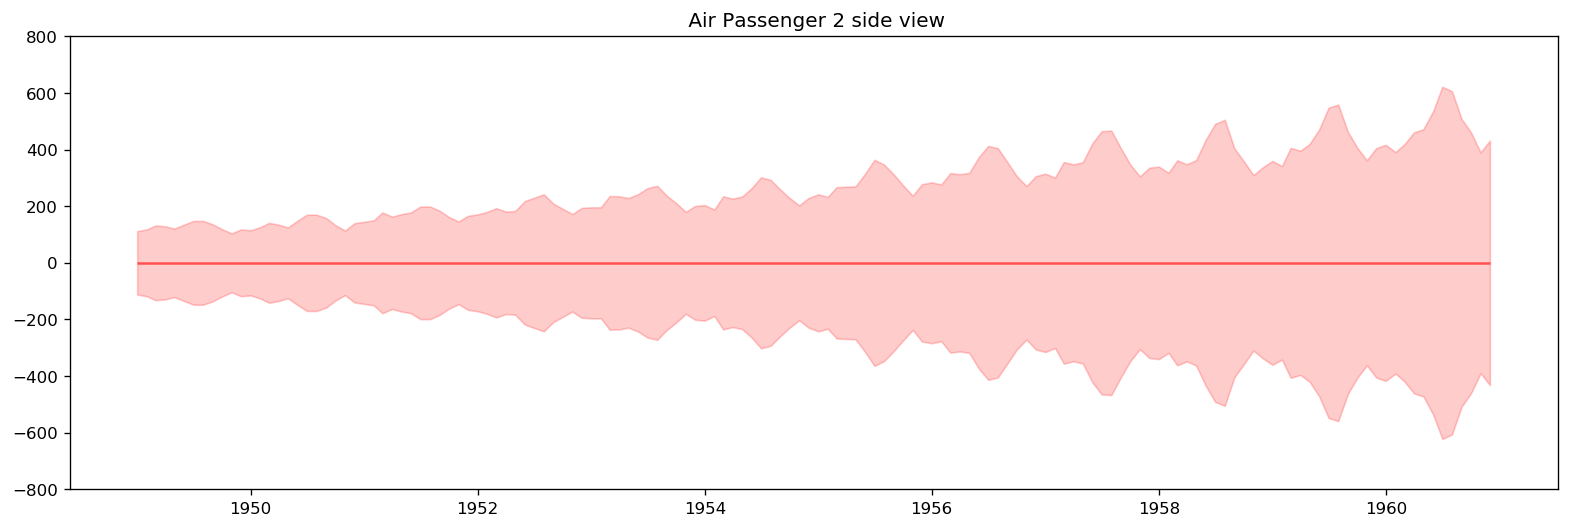

In [75]:
# Two side view

df2 = pd.read_csv("../Data/AirPassenger.csv",parse_dates=['Months'], index_col="Months")
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(df2.index, y1=df2.Passengers,y2=-df2.Passengers, alpha=0.2, color="red")
plt.hlines(y=0,xmin=min(df2.index),xmax=max(df2.index), colors="red", alpha=0.6)
plt.ylim(-800,800)
plt.title(" Air Passenger 2 side view")


In [90]:
# Seasonal Plot of a Time Series

df = pd.read_csv("../Data/a10.csv", parse_dates=["date"])
df['Year'] = [d.year for d in df['date']]
df['Month'] = [d.strftime('%b') for d in df['date']]
years=df['Year'].unique()

np.random.seed(100)
color_list = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

Text(0.5, 1.0, 'Seasonal Plot of Drug Sales')

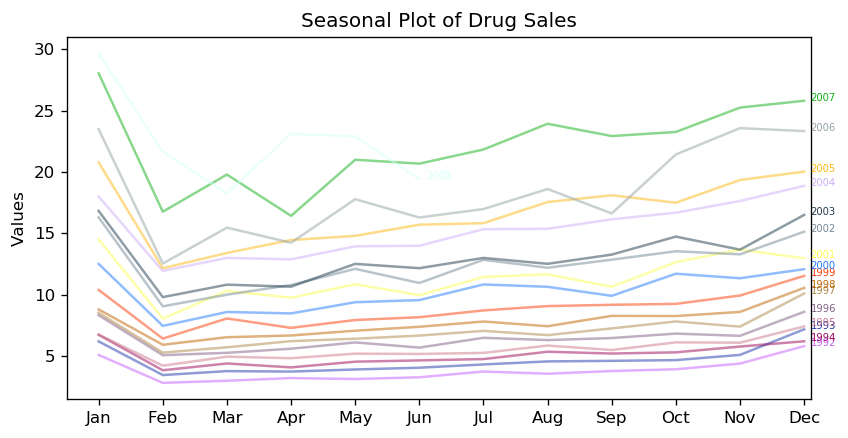

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi= 120)

for i,y in enumerate(years):
    if i > 0: 
        plt.plot("Month","value", data=df.loc[df.Year==y,:], color=color_list[i],label=y,alpha=0.5)
        plt.text(df.loc[df.Year==y, :].shape[0]-.9, df.loc[df.Year==y,"value"][-1:].values[0], y,color=color_list[i],fontsize=6)

plt.gca().set(xlim=(-0.5,11.1),ylabel="Values")
plt.title("Seasonal Plot of Drug Sales")

Text(0.5, 1.0, 'Month-wise Box Plot\n(The Seasonality)')

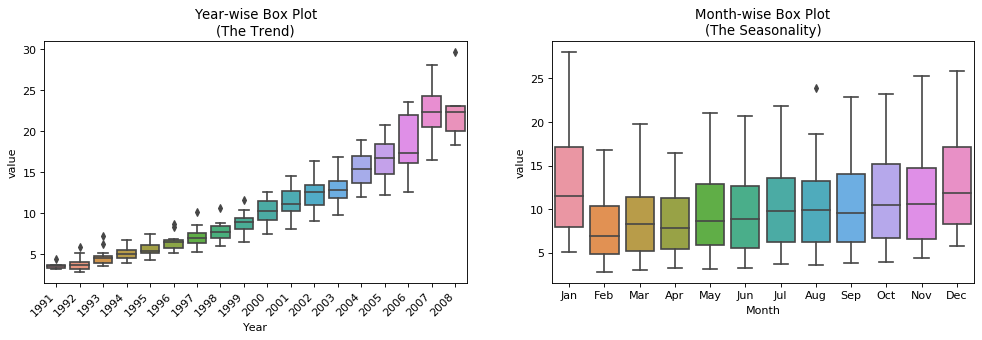

In [193]:
# Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

df = pd.read_csv("../Data/a10.csv", parse_dates=["date"])
df['Year'] = [d.year for d in df['date']]
df['Month'] = [d.strftime('%b') for d in df['date']]
years=df['Year'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15,4), dpi= 80)
sns.boxplot(x="Year",y="value",data=df,ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
sns.boxplot(x="Month",y="value",data=df.loc[~df.Year.isin([1991, 2008]), :],ax=axes[1])
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)

In [184]:
%config Completer.use_jedi = False